In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [18]:
colnames=['Class','Alch','Mallic','Ash','Alk_Ash','Mang','Tot_phenols','Flav','NFP','PAC','Colour','Hue','OD','Proline']
Data=pd.read_csv('wine (2).xls',names=colnames)

In [19]:
Data.head()

,Class,Alch,Mallic,Ash,Alk_Ash,Mang,Tot_phenols,Flav,NFP,PAC,Colour,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [26]:
Data.shape

(178, 14)

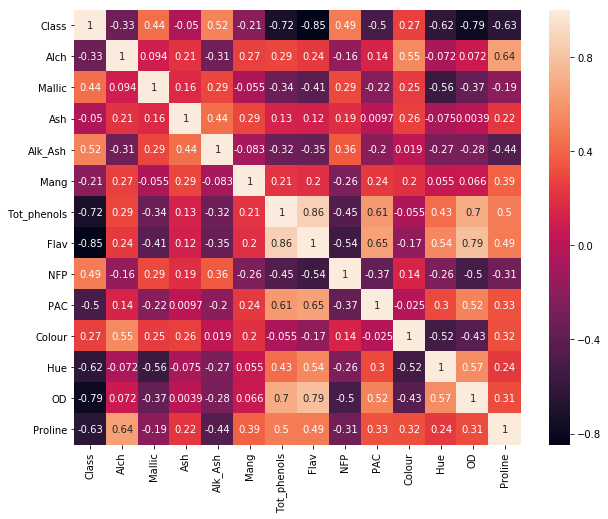

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(Data.corr(),annot=True)
plt.show()

In [21]:
Data.Class.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [22]:
x=Data.drop('Class',axis=1)

In [23]:
y=Data['Class']

In [24]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
kf=KFold (n_splits=3, shuffle=True, random_state=2)
acc=[]
for train,test in kf.split(x,y):
    M=LogisticRegression()
    X_train,X_test=x.iloc[train,:],x.iloc[test,:]
    Y_train,Y_test=y[train],y[test]
    M.fit(X_train,Y_train)
    Y_pred=M.predict(X_test)
    acc.append(metrics.accuracy_score(Y_test,Y_pred))
    print(metrics.classification_report(Y_test,Y_pred))
print(acc)
print('cross VALIDATE Accuracy mean%.2f%%'%np.mean(acc))
print('cross VALIDATE ACCVariance score %.6f%%'%np.var(acc,ddof=1))

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.88      1.00      0.94        22
           3       1.00      0.94      0.97        17

   micro avg       0.95      0.95      0.95        60
   macro avg       0.96      0.95      0.95        60
weighted avg       0.96      0.95      0.95        60

              precision    recall  f1-score   support

           1       0.88      1.00      0.94        15
           2       0.96      0.88      0.92        25
           3       0.95      0.95      0.95        19

   micro avg       0.93      0.93      0.93        59
   macro avg       0.93      0.94      0.93        59
weighted avg       0.93      0.93      0.93        59

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.96      0.96      0.96        24
           3       0.92      1.00      0.96        12

   micro avg       0